## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


## 1.Hierarchical Clustering

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries using pandas
crime_data=pd.read_csv('crime_data.csv',index_col=0)


### Performing EDA  on dataset
Now, I will explore the data to gain insights about the data. 

In [3]:
# Displaying first 5 records

crime_data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
# Displaying last 5 rows

crime_data.tail()

,Murder,Assault,UrbanPop,Rape
Virginia,8.5,156,63,20.7
Washington,4.0,145,73,26.2
West Virginia,5.7,81,39,9.3
Wisconsin,2.6,53,66,10.8
Wyoming,6.8,161,60,15.6


In [5]:
# View dimensions of dataset

crime_data.shape  

(50, 4)

<h4>Dataset has 50 rows and 4 columns</h4>

In [6]:
# View summary of dataset

crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


<h4>The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.</h4>

### Missing Values in variable

In [7]:
# Check missing value

crime_data.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<h4>There is no any null value</h4>

In [8]:
# Check mathematical calculations

crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<h4>The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value etc.</h4>

In [9]:
crime_data.value_counts()

Murder  Assault  UrbanPop  Rape
0.8     45       44        7.3     1
11.3    300      67        27.8    1
7.9     204      78        38.7    1
8.1     294      80        31.0    1
8.5     156      63        20.7    1
8.8     190      50        19.5    1
9.0     178      70        28.2    1
        276      91        40.6    1
9.7     109      52        16.3    1
10.0    263      48        44.5    1
10.4    249      83        24.0    1
11.1    254      86        26.1    1
11.4    285      70        32.1    1
2.1     57       56        9.5     1
12.1    255      74        35.1    1
12.2    252      81        46.0    1
12.7    201      80        25.5    1
13.0    337      45        16.1    1
13.2    188      59        26.9    1
        236      58        21.2    1
14.4    279      48        22.5    1
15.4    249      66        22.2    1
        335      80        31.9    1
16.1    259      44        17.1    1
7.4     159      89        18.8    1
7.3     120      75        21.4    1
7.2   

In [10]:
crime_data[crime_data.duplicated()].shape 

(0, 4)

<h4>There is no any duplicate value in the dataset.</h4>

In [11]:
crime_data=crime_data.rename({'UrbanPop':'UP'},axis=1)

In [12]:
crime_data.head()

,Murder,Assault,UP,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Detecting Outliers

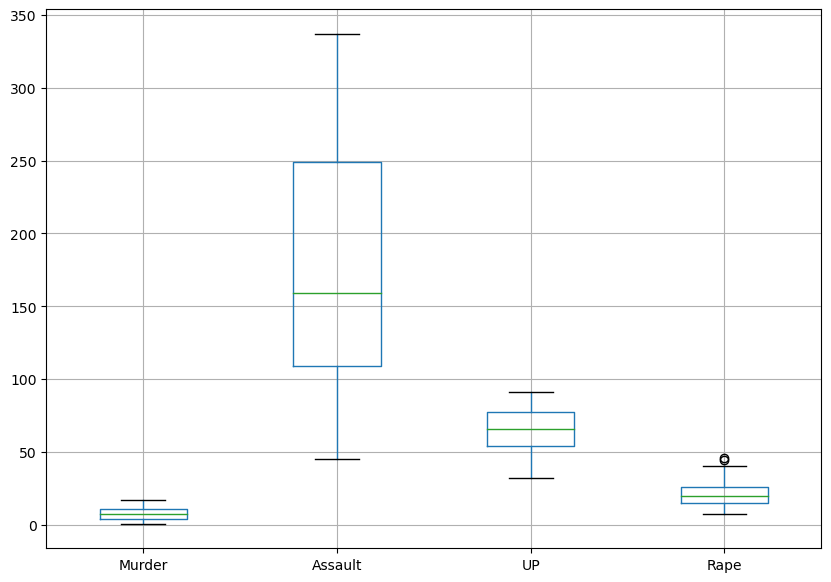

In [13]:
plt.figure(figsize=(10,7))
crime_data.boxplot()
plt.show()

<h4>As we can see that rape as 2 outliers.</h4>

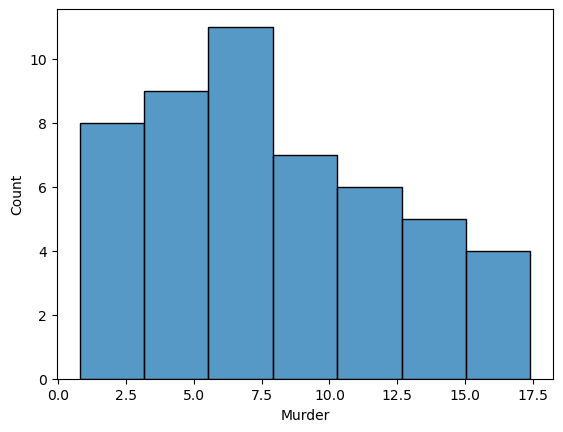

In [14]:
sns.histplot(x='Murder', data=crime_data)
plt.show()

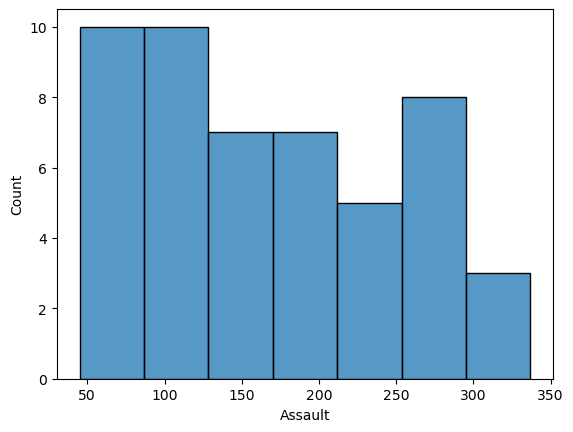

In [15]:
sns.histplot(x='Assault', data=crime_data)
plt.show()

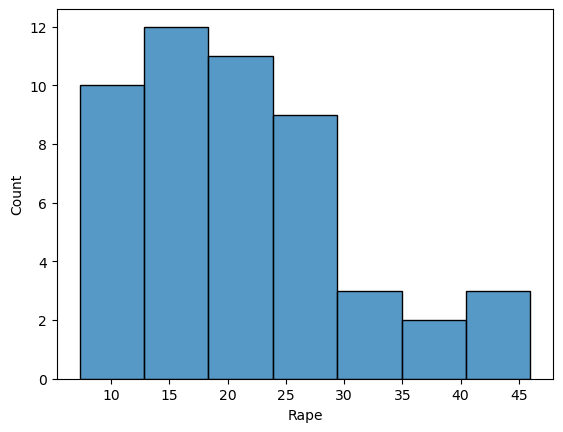

In [16]:
sns.histplot(x='Rape', data=crime_data)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

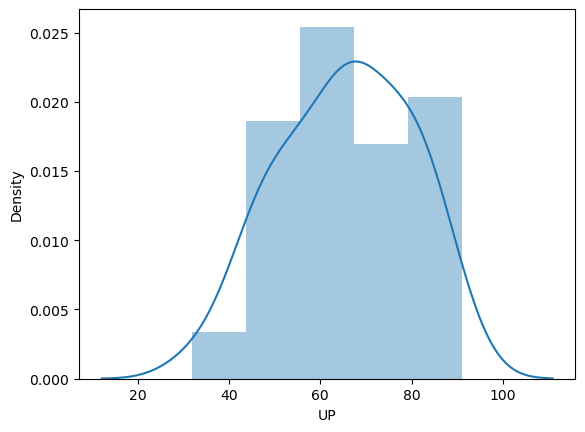

In [17]:
sns.distplot(crime_data['UP'])
plt.show

<h4>We can say that the Urban poplation has Normal distribution.Means it has same Mean,Mode and Median</h4>

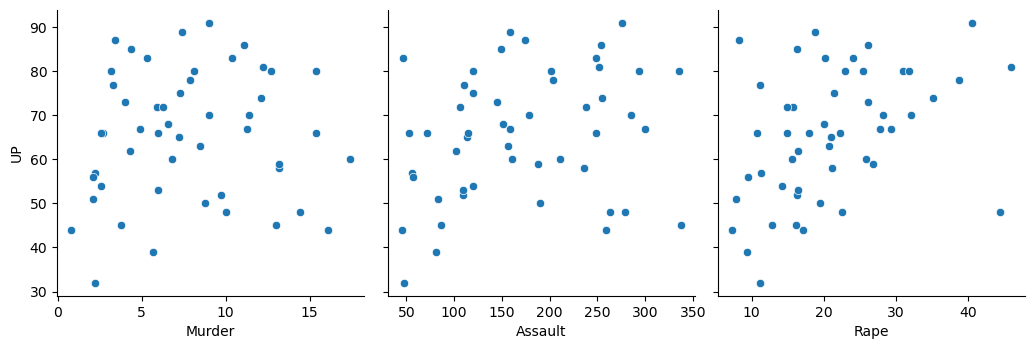

In [18]:
sns.pairplot(crime_data,x_vars=['Murder','Assault','Rape'],y_vars=['UP'],height=3.5,aspect=1,kind='scatter')
plt.show()

<h4>From the above pairplot we can see that relation of murder and assault to UP is neutral.</h4>

<AxesSubplot:xlabel='UP', ylabel='Rape'>

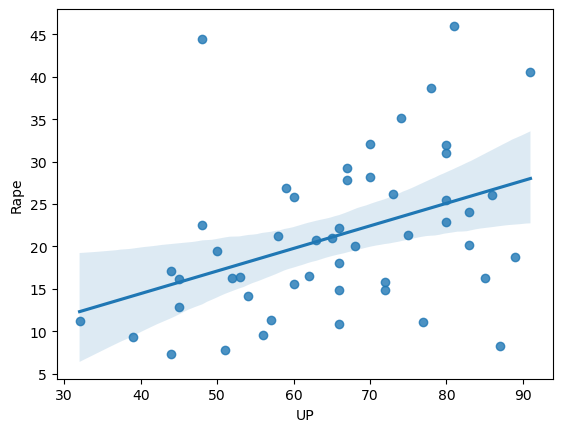

In [19]:
sns.regplot(x='UP',y='Rape',data=crime_data)

<h4>As we can see that,the rate of rape is incresing as the Urban population is going on increase.So,there should be some actions has to be taken to control the population.</h4>

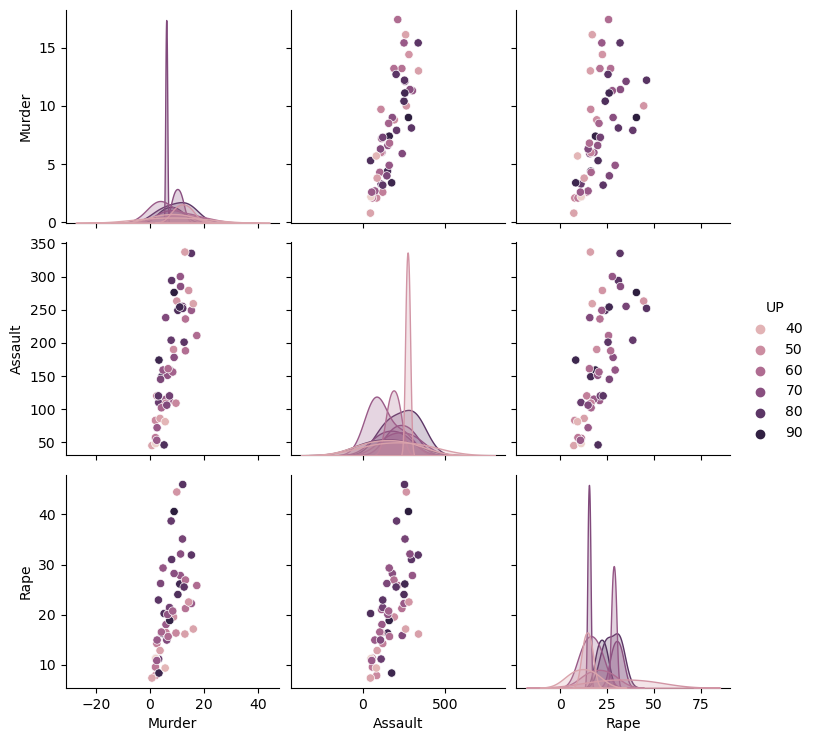

In [20]:
sns.pairplot(crime_data, hue='UP', height=2.5)
plt.show()

### Correlation

In [21]:
#Correlation between features.

cor=crime_data.corr() 
cor

,Murder,Assault,UP,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UP,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


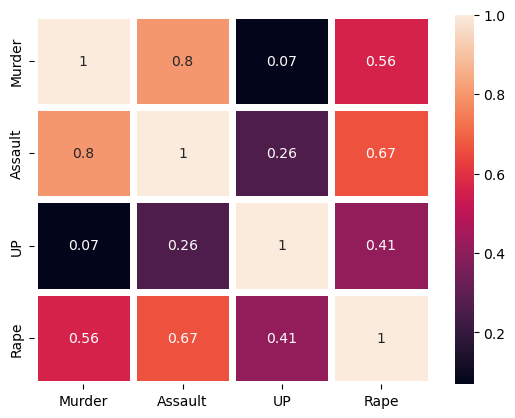

In [22]:
sns.heatmap(cor,linewidths=5,annot=True)
plt.show()

<h4>Insighs:</h4><br>
1.As we can see that the Assult with Murder as highest Correlation with 0.8 of possibilities.

<h4>To perform better or converge faster when the different features (variables) are on a smaller scale 
    we use Normalization Method.</h4>

In [23]:
# Normalization function

def norm_fun(i):
    x= (i-i.min())/(i.max()-i.min())
    return x

In [24]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_fun(crime_data.iloc[:,0:])

In [25]:
df_norm.head()

,Murder,Assault,UP,Rape
Alabama,0.746988,0.654110,0.440678,0.359173
Alaska,0.554217,0.746575,0.271186,0.961240
Arizona,0.439759,0.852740,0.813559,0.612403
Arkansas,0.481928,0.496575,0.305085,0.315245
California,0.493976,0.791096,1.000000,0.860465


<function matplotlib.pyplot.show(close=None, block=None)>

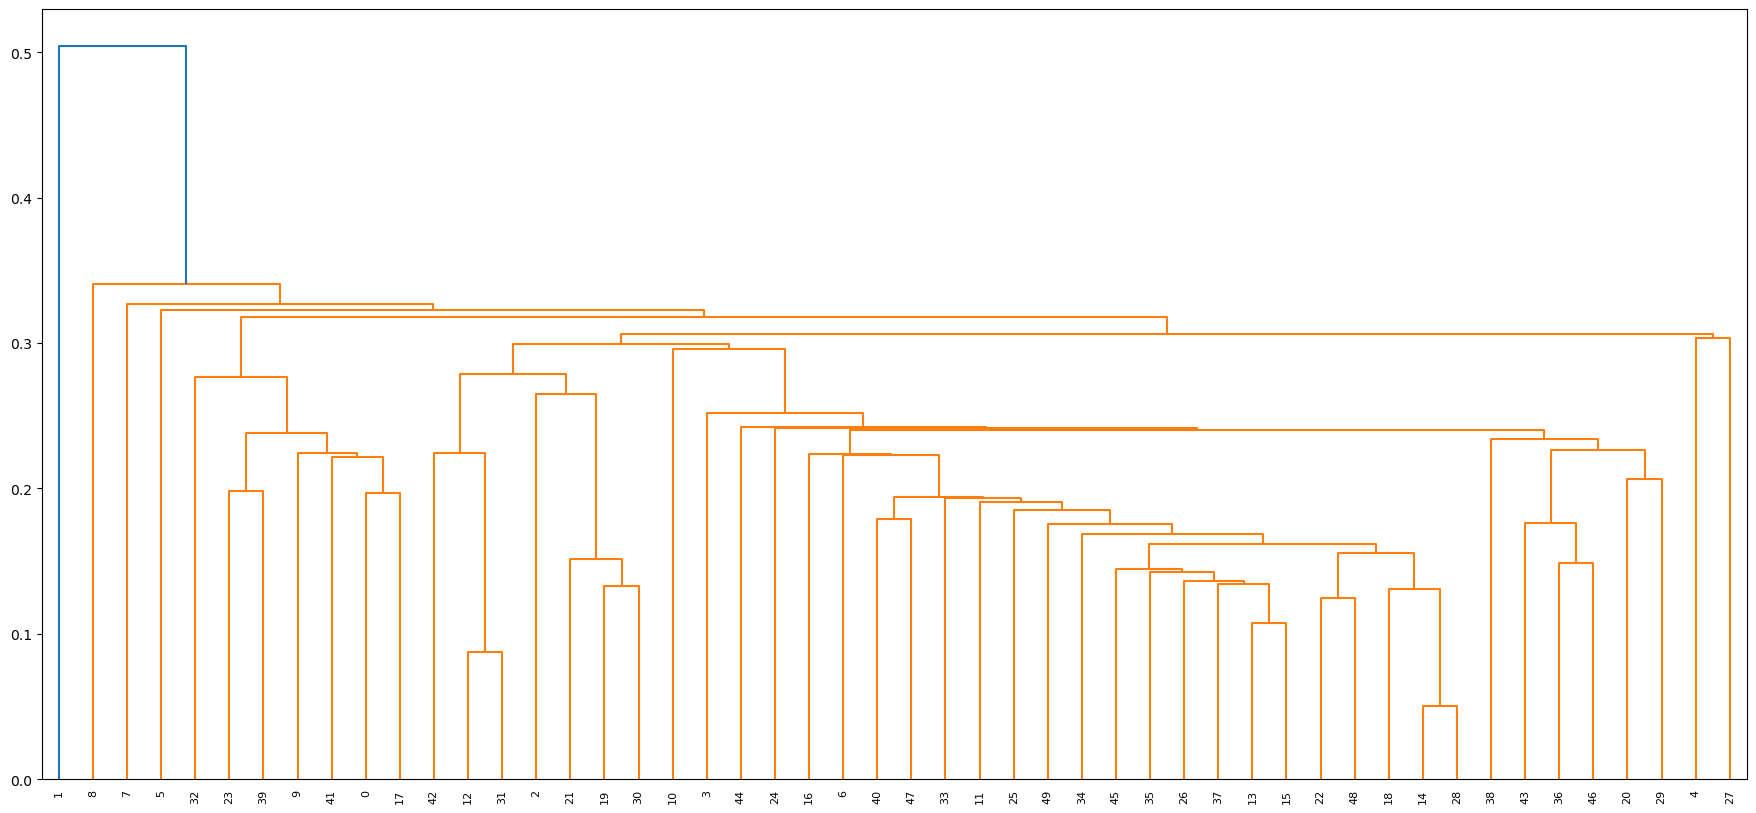

In [26]:
# creating dendogram
plt.figure(figsize=(22,10))
dendogram=sch.dendrogram(sch.linkage(df_norm, method='single')) #method single calculate minimum distance between points.
plt.show

In [27]:
# now creating cluster's 
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

In [28]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [29]:
crime_data['Clusterid'] = y_hc

In [30]:
crime_data[crime_data['Clusterid']== 1]

,Murder,Assault,UP,Rape,Clusterid
Delaware,5.9,238,72,15.8,1


In [31]:
crime_data.head()

,Murder,Assault,UP,Rape,Clusterid
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,0


In [32]:
from sklearn.metrics import silhouette_score

score = silhouette_score(crime_data, y_hc, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: -0.085


<h4>Inferences:</h4><br>First we have normalized the data because data has varying scales. Then using dendogram we carete linkage using 
               single method which calculate minimum distance between the two points.Using AgglomerativeClustering we create clusters.
               The Hierarchical Clustering has craeted in four clusters,containing the new column Clusterid.So,when the 
               new data will come it will check the values and based on it define the cluterid.

## 2.KMean Clustering

In [33]:
#importing KMeans clustering library 

from sklearn.cluster import KMeans  

In [34]:
# we will use same dataset

crime_data1=pd.read_csv('crime_data.csv',index_col=0)
crime_data1.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [35]:
crime_data1.shape   

(50, 4)

<h4>There are 50 rows and 4 features.</h4>

In [36]:
crime_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [37]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(crime_data1.iloc[:,0:])

In [38]:
#How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

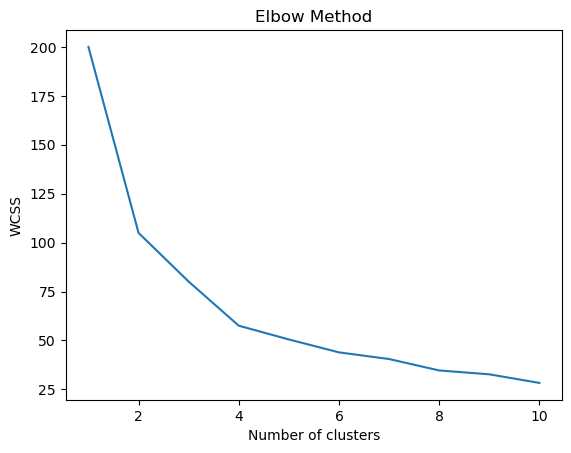

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<h4>By elbow method we can select the number of clusters as it is calculate Within-Cluster-Sum of Squared Errors (WSS) for different number of clusters (k)</h4>

In [40]:
#Building cluster algorithm 

new_clusters=KMeans(n_clusters=4,random_state=100) #from above elbow method we have choose number of clusters.
new_clusters.fit(scaled_Univ_df)

KMeans(n_clusters=4, random_state=100)

In [41]:
new_clusters.labels_

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 2, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

In [42]:
#Assign clusters to the data set

crime_data1['clusterid'] = new_clusters.labels_

In [43]:
#these are standardized values.

new_clusters.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [44]:
crime_data1.head()

,Murder,Assault,UrbanPop,Rape,clusterid
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2


In [45]:
from sklearn.metrics import silhouette_score

score = silhouette_score(crime_data1, new_clusters.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.212


<h4>Inferences:</h4><br>First we have normalized the data because data has varying scales using StandardScaler method.Then using elbow 
               method we have decided that how many clusters should we create for our dataset.
               The KMean Clustering has craeted four clusters,containing the new column Clusterid.So,when the 
               new data will come it will check the values and based on it define the cluterid.

## 3.DBSCAN Clustering 

In [46]:
#Importing DBSCAN clustering library

from sklearn.cluster import DBSCAN   

In [47]:
# we will use same dataset

crime_data2=pd.read_csv('crime_data.csv',index_col=0)
crime_data2.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [48]:
crime_data2.shape   

(50, 4)

<h4>There are 50 rows and 4 features.</h4>

In [49]:
crime_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [50]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(crime_data2.iloc[:,0:])

In [51]:
scaled_Univ_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [52]:
#creating clusters
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(scaled_Univ_df)

DBSCAN(eps=0.8, min_samples=6)

In [53]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [54]:
#Assign clusters to the data set
crime_data2['clusterid_new'] = dbscan.labels_

In [55]:
crime_data2[crime_data2['clusterid_new']==0]

,Murder,Assault,UrbanPop,Rape,clusterid_new
Indiana,7.2,113,65,21.0,0
Kansas,6.0,115,66,18.0,0
Nebraska,4.3,102,62,16.5,0
Ohio,7.3,120,75,21.4,0
Oklahoma,6.6,151,68,20.0,0
Pennsylvania,6.3,106,72,14.9,0
Virginia,8.5,156,63,20.7,0
Wyoming,6.8,161,60,15.6,0


In [56]:
from sklearn.metrics import silhouette_score

score = silhouette_score(crime_data2, dbscan.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: -0.064


<h4>Inferences:</h4><br>First we have normalized the data because data has varying scales using StandardScaler method.The DBSCAN clusters 
               find out noise from our data then we create epsilon,min points,an border point.And the noisy is denoted by -1.
               